# W2M4 - Multiprocessing: all-in-one

### 학습 목표
- Demonstrate understanding of Python's multiprocessing module to handle concurrent tasks using queues and processes.

### 사전지식
### 기능요구사항
- Task Distribution:
    - Distribute 10 tasks (Task no 0 to Task no 9) using a Queue (tasks_to_accomplish) to be executed by multiple processes.

- Process Execution:
    - Create 4 processes to concurrently retrieve tasks from tasks_to_accomplish, execute them, and store results in another Queue (tasks_that_are_done).
    - Each process should print the task it is currently executing and add a completion message to tasks_that_are_done.
    - Use time.sleep(0.5) to simulate task execution time.

- Task Completion:
    - Ensure all processes complete their tasks and synchronize using Process.join().
    - Print out the completion messages stored in tasks_that_are_done after all processes have finished.

### 프로그래밍 요구사항
- Write a program to run all the tasks and name it 'multiprocessing.py'
- Utilize Python's multiprocessing module.
- Implement a task distribution system using Queue for tasks and results.
- Create multiple processes to execute tasks concurrently.
- Use Queue.get_nowait() and exception handling to manage tasks dynamically between processes.

### 예상결과 및 동작예시
Task no 0  
Task no 1  
Task no 2  
Task no 3  
Task no 4  
Task no 5  
Task no 6  
Task no 7  
Task no 8  
Task no 9  
Task no 0 is done by Process-1  
Task no 1 is done by Process-2  
Task no 2 is done by Process-3  
Task no 3 is done by Process-4  
Task no 4 is done by Process-1  
Task no 5 is done by Process-2  
Task no 6 is done by Process-3  
Task no 7 is done by Process-4  
Task no 8 is done by Process-1  
Task no 9 is done by Process-2  
** 어떤 프로세스가 처리했는지는 실행 때마다 변경됩니다. **

---

In [ ]:
from multiprocessing import Process, Queue, current_process
import time

def worker(tasks_to_accomplish, tasks_that_are_done):
    while True:
        try:
            task = tasks_to_accomplish.get_nowait()
        except Exception:
            break
        else:
            print(f"{task} is being executed by {current_process().name}")
            time.sleep(0.5)
            tasks_that_are_done.put(f"{task} is done by {current_process().name}")

def main():
    tasks_to_accomplish = Queue()
    tasks_that_are_done = Queue()
    
    for task_no in range(10):
        task = f"Task no {task_no}"
        print(task)
        tasks_to_accomplish.put(task)

    processes = []
    for i in range(2):
        process = Process(target=worker, args=(tasks_to_accomplish, tasks_that_are_done))
        processes.append(process)
        process.start()
        
    for process in processes:
        process.join()
        
    print("\nTask Completion Results:")
    while not tasks_that_are_done.empty():
        print(tasks_that_are_done.get())  
    
if __name__ == "__main__":
    main()

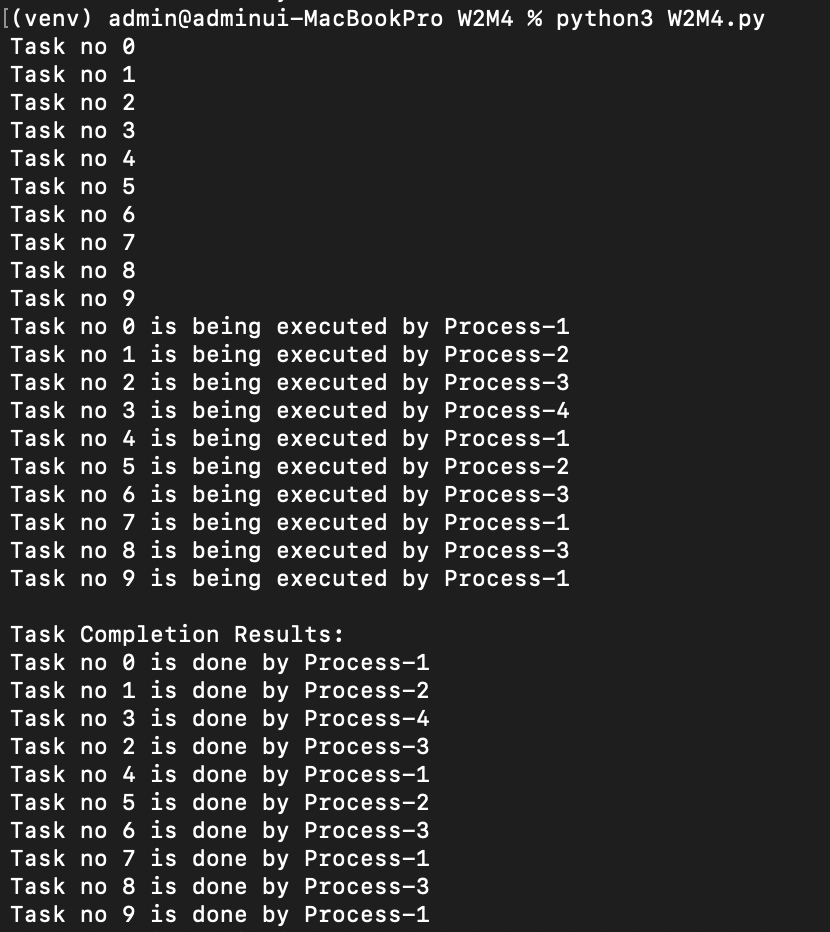

---

# multiprocessing.py 로 저장해서 실행 시 문제점


AttributeError: module 'multiprocessing' has no attribute 'Pool' 오류는 일반적으로 Python 스크립트 파일의 이름이 **multiprocessing.py**로 되어 있거나, 같은 디렉토리에 multiprocessing.py라는 파일이 존재하는 경우 발생한다. Python은 실행 중인 파일을 우선적으로 모듈로 인식하기 때문에 multiprocessing 모듈 대신 현재 디렉토리의 파일을 불러오려고 시도한다.  

해결방안?
- 다른 이름으로 변경